In [201]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
data=pd.read_csv("Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [203]:
X=data["Level"].to_numpy()  # we can see that column position and level have correlation 1 
# therefore no need to consider position 
y=data["Salary"].to_numpy()

In [204]:
class PolynomialRegression():
    def __init__(self,poly_features):
        self.nf=poly_features
        self.theta=np.random.random(self.nf)
    def getH(self,X):
        n=X.shape[0]
        h=np.zeros(n)
        for i in range(n):
            for j in range(self.nf):
                h[i]+=(X[i]**j)*(self.theta[j])
        return h
    def GetRMSError(self,X,y):
        h=self.getH(X)
        cost=np.sqrt(np.mean((h-y)**2))
        return cost
    def Gradient_Descent(self,X,y,num_iters,alpha):
        h=self.getH(X)
        n=X.shape[0]
        for i in range(num_iters):
            for j in range(self.nf):
                self.theta[j]=self.theta[j]-(alpha)*np.mean((h-y)*(X**j));
            h=self.getH(X)
#             print("cost in iteration {} : {}".format(i,self.GetRMSError(X,y)))
        return self.theta
    def plot(self,X,y):
        fig=plt.figure(figsize=(5,5))
        plt.scatter(X,y)
        y_pred=self.getH(X)
        plt.plot(X,y_pred,color="r")
    def fit(self,X,y,num_iters=10000,alpha=0.001):
        return self.Gradient_Descent(X,y,num_iters,alpha);
    def Predict(self,X):
        return self.getH(X)

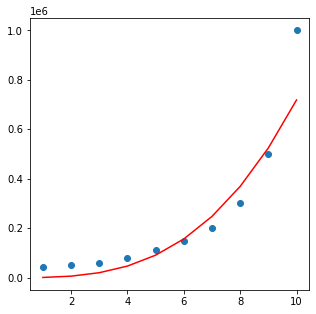

In [205]:
pr=PolynomialRegression(poly_features=4)
theta=pr.fit(X,y,100,0.0000001) # fitting model
cost=pr.GetRMSError(X,y) # getting rms error
pr.plot(X,y) # plotting data

In [206]:
print("Rms error :{}".format(cost))

Rms error :96905.50189933354
